In [30]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe

In [31]:
df = pd.read_csv("upload.csv")
df

,IR,MR,FF,CR,CO,OP,Class
0,A,A,P,A,P,A,NB
1,P,N,A,A,A,P,NB
2,N,P,A,A,A,N,NB
3,P,N,A,A,A,N,NB
4,P,N,P,P,P,P,NB
5,N,P,P,P,P,N,NB
6,P,N,P,P,P,N,NB
7,N,N,A,P,P,P,NB
8,P,N,P,A,A,P,NB
9,N,P,A,P,A,P,NB


In [32]:
data = pd.read_csv("upload1.csv")
data

,IR,MR,FF,CR,CO,OP,Class
0,A,A,P,A,P,A,1
1,P,N,A,A,A,P,1
2,N,P,A,A,A,N,1
3,P,N,A,A,A,N,1
4,P,N,P,P,P,P,1
5,N,P,P,P,P,N,1
6,P,N,P,P,P,N,1
7,N,N,A,P,P,P,1
8,P,N,P,A,A,P,1
9,N,P,A,P,A,P,1


In [33]:
X= data.drop(columns="Class")
y=data.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16, 6), (4, 6), (16,), (4,))

In [34]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ['IR','MR','FF','CR','CO','OP']),
])

In [36]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB()),
    
])


In [37]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IR', 'MR', 'FF', 'CR', 'CO',
                                                   'OP'])])),
                ('algo', GaussianNB())])

In [38]:
pipeline.score(X_train, y_train)

1.0

In [39]:
pipeline.score(X_test,y_test)

1.0

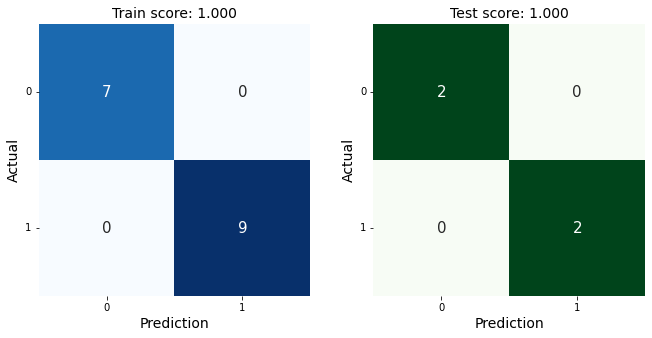

In [40]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)